# Task 3: Association Rules And Lift Analysis

Alex Rivera ID#011243153

Western Governors University

D212 - Data Mining  II 

November 14, 2023

## A1: Proposal Of Question

The research question for this project is, "Can market basket analysis assist in identifying which items are purchased with the top item with a degree of confidence?"

## A2: Defined Goal

The goal of the analysis is to apply market basket analysis and get insights from the top items purchased by customers. These insights can be used to reduce customer churn by applying discounts or marketing strategies. The exploratory analysis on the top item will provide the supporting data the executive team was requesting. Once complete, the market basket analysis process can be applied to other top items in question.

## B1: Explanation Of Market Basket

Market basket analysis is a data mining technique that allows for insights into customer purchasing patterns. Kadlaskar provided a 5 step overview of the steps needed to implement MBA and expected outcomes (Kadlaskar, 2023). First, collecting data on customer transactions. An example of a single transaction is provided in section B2 from the teleco_market_basket CSV. Second, preprocessing the data by handling nulls and converting it into a format to apply the algorithm. The transactions are turned into a list of lists of all the items as boolean values, an example of the output provided in section C1. Third is the application of the association rules Apriori algorithm which identifies frequent item sets and rules between these items. Fourth is calculating the support and confidence of each item set, examples of calculations provided by Selvaraj from a sample dataset:

    Support(item) = Transactions comprising the item / Total transactions
    support(milk) = ¾ = 0.75. This means that milk is present in 75% of all purchases.
    
    Confidence (Bread -> Milk) = Transactions comprising bread and milk / Transactions comprising bread
    Confidence (Bread -> Milk) = ¾ = 0.75 (Selvaraj, 2023)

Fifth, is the expected outcomes of generating the association rules of the frequent item sets by confidence and support calculations above. The association rules provide a likelihood of items being purchased with one another. 

## B2: Transaction Example

In [1]:
#Importing necessary packages for market basket analysis 
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#Loading the teleco_market_basket dataset flat file into a pandas dataframe 
market_basket = pd.read_csv('C:/Users/alexa/WGU/D212/Project/teleco_market_basket.csv', index_col=False)

In [3]:
#Slicing a single transaction
market_basket[1:2]

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses


## B3: Market Basket Assumption

Market basket analysis implements the apriori algorithm and one of the assumptions of this algorithm is the apriori principle. The apriori principle states, "All subsets of a frequent item set must also be frequent" (Garg, 2019). This assumption assists in eliminating patterns that cannot be supported because of the subsets. The inverse is true also, all subsets of an infrequent itemset must also be infrequent.

## C1: Transforming The Data Set

Dr. Kamara's tutorial on applying market basket analysis in Python was referenced for coding (Kamara, 2023).

In [4]:
#Drop Na rows and columns
market_basket.dropna(how='all', inplace=True)

In [5]:
#Review info and shape
market_basket.info()
market_basket.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 1 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 1.2+ MB


(7501, 20)

In [6]:
#Create list of list to prepare dataset for encoding
trans = []
for i in range (0,7501):
    trans.append([str(market_basket.values[i,j]) for j in range(0,20)])

In [7]:
#Transactionalize dataset to prepare data suitable for Apriori function
TE = TransactionEncoder()
array = TE.fit(trans).transform(trans)

In [8]:
#Convert dataset back to dataframe
cleaned_market_basket = pd.DataFrame(array, columns= TE.columns_)

In [9]:
#Drop empty columns
cleaned_market_basket = cleaned_market_basket.drop(['nan'], axis =1)

cleaned_market_basket

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#Save prepared market basket dataset to CSV 
cleaned_market_basket.to_csv('C:/Users/alexa/WGU/D212/Project/Market_Basket_Prepared_Data.csv', index=False)

## C2: Code Execution

Code to generate association rules executed in section C3, error-free screenshots provided below:

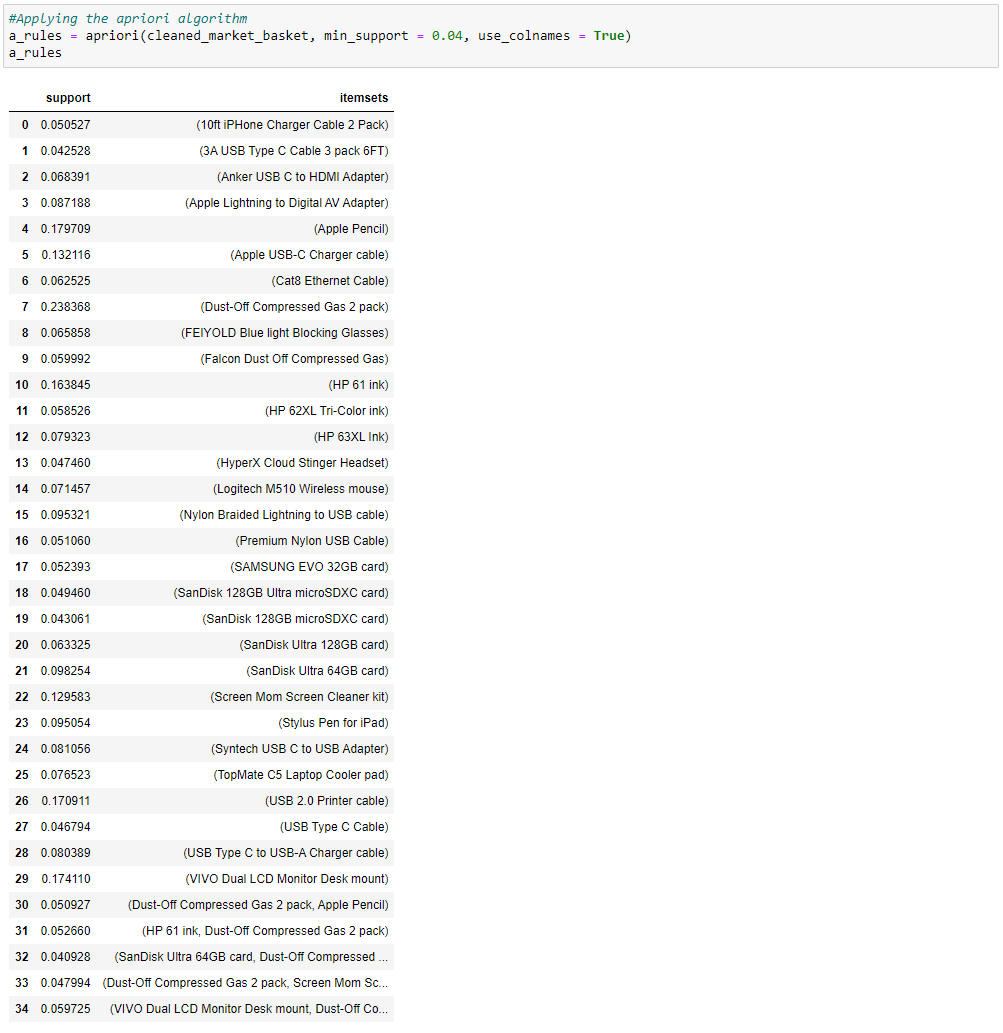
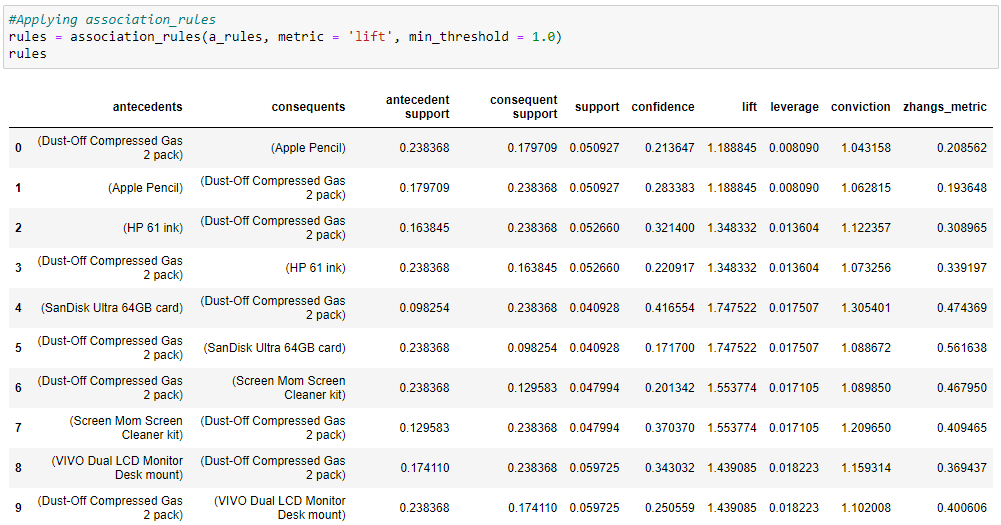

## C3: Association Rules Table

Dr. Kamara's tutorial on applying market basket analysis in Python was referenced for coding (Kamara, 2023).

In [11]:
#Applying the apriori algorithm
a_rules = apriori(cleaned_market_basket, min_support = 0.04, use_colnames = True)
a_rules

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.068391,(Anker USB C to HDMI Adapter)
3,0.087188,(Apple Lightning to Digital AV Adapter)
4,0.179709,(Apple Pencil)
5,0.132116,(Apple USB-C Charger cable)
6,0.062525,(Cat8 Ethernet Cable)
7,0.238368,(Dust-Off Compressed Gas 2 pack)
8,0.065858,(FEIYOLD Blue light Blocking Glasses)
9,0.059992,(Falcon Dust Off Compressed Gas)


In [12]:
#Retrive item with the highest support for research question
max_index = a_rules['support'].idxmax()
max_value = a_rules.loc[max_index, 'itemsets']

max_value

frozenset({'Dust-Off Compressed Gas 2 pack'})

In [13]:
#Applying association_rules
rules = association_rules(a_rules, metric = 'lift', min_threshold = 1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Apple Pencil),(Dust-Off Compressed Gas 2 pack),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
1,(Dust-Off Compressed Gas 2 pack),(Apple Pencil),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
2,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
3,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
4,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
5,(Dust-Off Compressed Gas 2 pack),(SanDisk Ultra 64GB card),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672,0.561638
6,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
7,(Dust-Off Compressed Gas 2 pack),(Screen Mom Screen Cleaner kit),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
8,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
9,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


## C4: Top Three Rules

The top three rules sorted by lift can be seen below with their supporting support and confidence. Support is used to identify the overall popularity of the item in all transactions. Selvaraj explained the impact of support, "A high support value indicates that the item is present in most purchases, therefore marketers should focus on it more" (Selvaraj, 2023). Confidence is the likelihood of purchasing item set. Lift is an increased ratio of how  more likely a customer would purchase an item if another item is sold. 

In [14]:
#Sorting by lift and slicing top 3
rules = rules.sort_values(by='lift', ascending= False)
Top_3 = rules[:3]
Top_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Dust-Off Compressed Gas 2 pack),(SanDisk Ultra 64GB card),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672,0.561638
4,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
6,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465


## D1: Significance Of Support, Lift, And Confidence Summary

Now that the market basket analysis has been implemented and the project question can be answered, can market basket analysis assists in identifying which items are purchased with the top item with a degree of confidence? The top item in the transaction dataset was the Dust-Off Compressed Gas 2 pack and the rules relating to this item are below. 

- Confidence: The rules are sorted by confidence ranging from 17.2% to 25.1% of the likelihood of the purchase combination.
- Support: The overall popularity of the items ranging from 40.1% to 59.7%. 
- Lift: An increased ratio to purchase an item ranging from 1.19 to 1.75 times likely to buy the items. 

In [15]:
#Running analysis for top item by confidence
findings = rules[rules['antecedents'] == {'Dust-Off Compressed Gas 2 pack'}]
findings = findings.sort_values(by='confidence', ascending= False)
findings[["antecedents","consequents","support","confidence","lift"]]

,antecedents,consequents,support,confidence,lift
8,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.059725,0.250559,1.439085
3,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.052660,0.220917,1.348332
1,(Dust-Off Compressed Gas 2 pack),(Apple Pencil),0.050927,0.213647,1.188845
7,(Dust-Off Compressed Gas 2 pack),(Screen Mom Screen Cleaner kit),0.047994,0.201342,1.553774
5,(Dust-Off Compressed Gas 2 pack),(SanDisk Ultra 64GB card),0.040928,0.171700,1.747522


## D2: Practical Significance Of Findings

The practical significance of the insights into the association rules of the top item is very valuable for a company that has no data on the customer transaction it has collected. While not very statically significant from the confidence value of 17.2% to 25.1% it does show a relationship between the item sets that are utilized as a basis for interpretation.

## D3: Course Of Action

A list of associated rules for the top item with a confidence of 17.2% to 25.1% likelihood can be provided to the executive team for review. While providing the associated rules it should be highlighted that the information is not statistically significant but should be valuable insights of items to target for discount strategies. Continue to provide additional rules on top items to help achieve the level of customer retention and loyalty the organization is aiming for.  

## E & E1: Panopto Video Of Code & Programs

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c892e9ff-059a-47e1-8f65-b0bc014cb396

## F: Sources For Third-Party Code

Kamara, K. (2023, November). Data Mining II - D212. Retrieved November 8, 2023, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=dbe89ddb-e92f-4d40-a87a-af030178abf1. 

## G: Sources

Garg, A. (2019, February 7). Complete Guide to Association rules (2/2). Medium. https://towardsdatascience.com/complete-guide-to-association-rules-2-2-c92072b56c84 

Kadlaskar, A. (2023, August 31). Market basket analysis: A comprehensive guide for businesses. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/ 

Selvaraj, N. (2023, April 24). How to perform Market Basket Analysis. 365 Data Science. https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/ 